In [1]:
import omicverse as ov
ov.utils.ov_plot_set()
from matplotlib import rcParams

# 设置全局字体为Arial
rcParams['font.family'] = 'Arial'

2024-12-15 00:31:47.972402: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-15 00:31:48.024283: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-15 00:31:48.040104: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-15 00:31:48.074985: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-15 00:31:50.134062: W tensorflow/compiler/tf2


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.9, Tutorials: https://omicverse.readthedocs.io/
Dependency error: (pydeseq2 0.4.11 (/mnt/home/zehuazeng/software/rsc/lib/python3.10/site-packages), Requirement.parse('pydeseq2<=0.4.0,>=0.3'))


In [2]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
import cellrank as cr
import scvelo as scv

In [4]:
o='Tongue'
adata=sc.read_h5ad(f'data/mouse_h5ad/{o}_drop_raw.h5ad')
adata.layers['counts']=adata.X.copy()
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=10000, 
                            flavor="seurat_v3",layer='counts',)
adata=adata[:,adata.var['highly_variable']==True]
adata_tongue=adata

normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)


In [5]:
o='Thymus'
adata=sc.read_h5ad(f'data/mouse_h5ad/{o}_drop_raw.h5ad')
adata.layers['counts']=adata.X.copy()
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=10000, 
                            flavor="seurat_v3",layer='counts',)
adata=adata[:,adata.var['highly_variable']==True]
adata_thymus=adata

normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)


In [12]:
o='Bladder'
adata=sc.read_h5ad(f'data/mouse_h5ad/{o}_drop_raw.h5ad')
adata.layers['counts']=adata.X.copy()
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=10000, 
                            flavor="seurat_v3",layer='counts',)
adata=adata[:,adata.var['highly_variable']==True]
adata_bladder=adata

normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)


In [7]:
adata_tongue,adata_thymus,adata_colon

(View of AnnData object with n_obs × n_vars = 1432 × 10000
     var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
     uns: 'log1p', 'hvg'
     layers: 'counts',
 View of AnnData object with n_obs × n_vars = 1580 × 10000
     var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
     uns: 'log1p', 'hvg'
     layers: 'counts',
 View of AnnData object with n_obs × n_vars = 4149 × 10000
     var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
     uns: 'log1p', 'hvg'
     layers: 'counts')

/mnt/home/zehuazeng/software/rsc/lib/python3.10/site-packages/omicverse/pp/_preprocess.py:514: ImplicitModificationWarning: Setting element `.layers['scaled']` of view, initializing view as actual.
  adata.layers[layers_add] = adata_mock.X.copy()


computing PCA
    with n_comps=50
    finished (0:00:06)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 13 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:05)
Storing dendrogram info using `.uns['dendrogram_leiden']`
ranking genes
    finished: added to `.uns['leiden_ttest']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


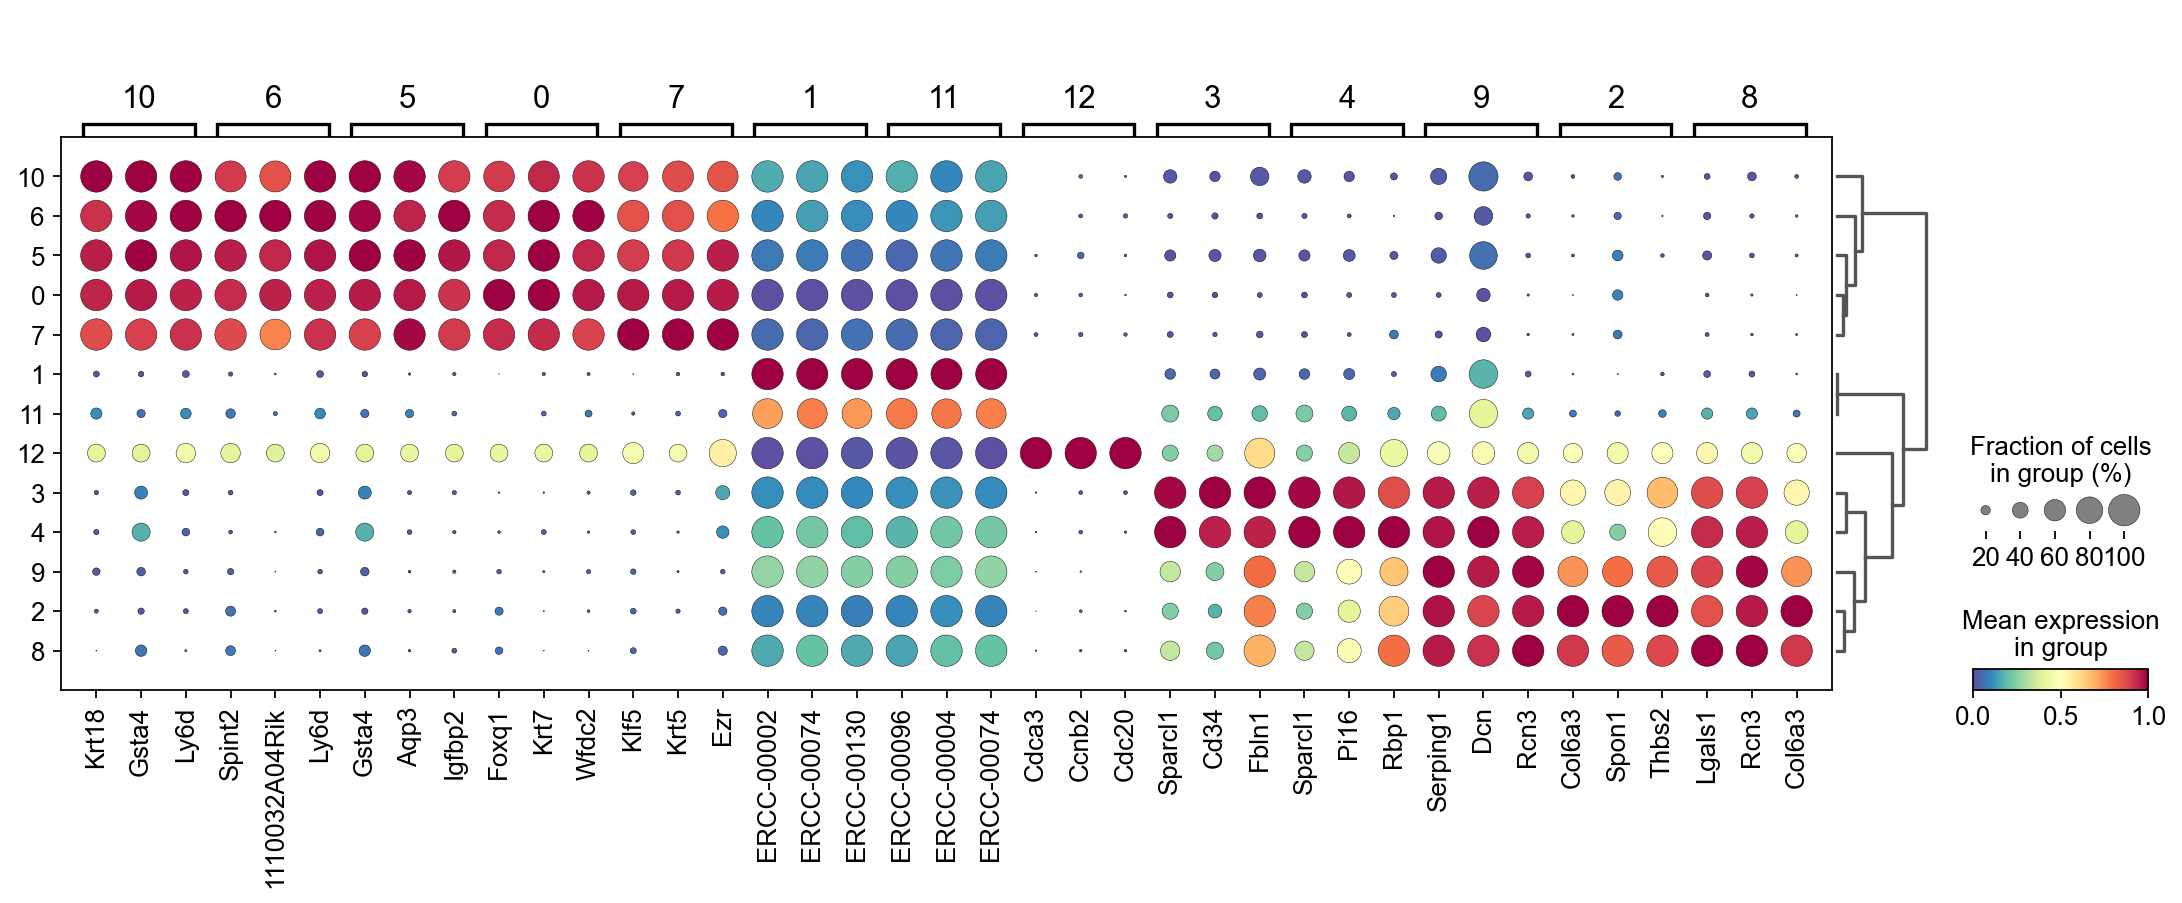

...get cell type marker


  0%|          | 0/5 [00:00<?, ?it/s]

Note: AGI API key found: returning the cell type annotations.


 20%|██        | 1/5 [00:03<00:14,  3.62s/it]

Note: It is always recommended to check the results returned by GPT-4 in case of AI hallucination, before going to downstream analysis.
Note: AGI API key found: returning the cell type annotations.


 40%|████      | 2/5 [00:06<00:09,  3.11s/it]

Note: It is always recommended to check the results returned by GPT-4 in case of AI hallucination, before going to downstream analysis.
Note: AGI API key found: returning the cell type annotations.


 60%|██████    | 3/5 [00:09<00:05,  2.95s/it]

Note: It is always recommended to check the results returned by GPT-4 in case of AI hallucination, before going to downstream analysis.
Note: AGI API key found: returning the cell type annotations.


 80%|████████  | 4/5 [00:12<00:03,  3.12s/it]

Note: It is always recommended to check the results returned by GPT-4 in case of AI hallucination, before going to downstream analysis.
Note: AGI API key found: returning the cell type annotations.


100%|██████████| 5/5 [00:15<00:00,  3.08s/it]


Note: It is always recommended to check the results returned by GPT-4 in case of AI hallucination, before going to downstream analysis.


100%|██████████| 13/13 [00:23<00:00,  1.83s/it]


In [13]:
for name,adata in zip(['Bladder'],
                 [adata_bladder]):
    ov.pp.scale(adata)
    ov.pp.pca(adata,layer='scaled',n_pcs=50)
    sc.pp.neighbors(adata, n_neighbors=15, n_pcs=50,
                   use_rep='scaled|original|X_pca')
    adata.obsm["X_mde"] = ov.utils.mde(adata.obsm["scaled|original|X_pca"])
    sc.tl.leiden(adata)
    sc.tl.umap(adata)
    sc.tl.dendrogram(adata,'leiden',use_rep='scaled|original|X_pca')
    sc.tl.rank_genes_groups(adata, 'leiden', use_rep='scaled|original|X_pca',
                            method='t-test',use_raw=False,key_added='leiden_ttest')
    sc.pl.rank_genes_groups_dotplot(adata,groupby='leiden',
                                    cmap='Spectral_r',key='leiden_ttest',
                                    standard_scale='var',n_genes=3)
    all_markers=ov.single.get_celltype_marker(adata,clustertype='leiden',rank=True,
                                          key='leiden_ttest',
                                          foldchange=2,topgenenumber=15)
    import gptbioinsightor as gbi 

    ### 设置大语言模型的API KEY
    import os
    os.environ['API_KEY'] = "sk-"
    
    # 设置数据的背景信息
    background = f"Cells from {name} mouse" 
    
    # 确保adata已经进行了差异基因分析，例如: sc.tl.rank_genes_groups(adata, "leiden", method="wilcoxon")
    # 我们使用Aliyun 的 qwen2-72b-instruct 进行演示, 但你也可以使用 openai gpt-4o
    res = gbi.get_celltype(all_markers, background=background, 
                        out="result/pbmc_celltype_info.md", 
                        topnumber=15,provider="aliyun", model="qwen-max")
    adata.obs['celltype_gbi']=adata.obs['leiden'].map(res)
    adata.uns['marker_dict']=all_markers
    adata.obs['best_clusters']=adata.obs['leiden']
    import os
    os.environ['AGI_API_KEY'] = 'sk-'  # Replace with your actual API key
    def celltype_anno_gpt4celltype(adata,model='gpt-4o',base_url="https://aigptx.top/v1",gpt_num=5):
        result_gpt_dict={}
        from tqdm import tqdm
        for t in tqdm(range(gpt_num)):
            result_gpt = ov.single.gptcelltype(adata.uns['marker_dict'],
                                           tissuename=name, speciename='mouse',
                                  model=model,base_url=base_url,
                                  topgenenumber=10)
            result_gpt_dict[t]=result_gpt
            adata.obs[f'gpt_celltype_{t}'] = adata.obs['best_clusters'].map(result_gpt).astype('category')
    celltype_anno_gpt4celltype(adata)
    gpt_num=5
    cluster_celltypes={}
    adata.obs['best_clusters']=adata.obs['best_clusters'].astype('category')
    for ct in adata.obs['best_clusters'].cat.categories:
        ct1=adata.obs.loc[adata.obs['best_clusters']==ct,'celltype_gbi'].value_counts().index[0]
        #ct2=adata.obs.loc[adata.obs['best_clusters']==ct,'cell_type_from_mulan_smoothing'].value_counts().index[0]
        ct_li=[]
        for num in range(gpt_num):
            ct_li.append(adata.obs.loc[adata.obs['best_clusters']==ct,f'gpt_celltype_{num}'].value_counts().index[0])
    
        cluster_celltypes[ct]=[ct1]+ct_li
    
    cluster_markers = adata.uns['marker_dict']
    
    # 调用函数并打印结果
    result = get_cluster_celltype(cluster_celltypes, cluster_markers, 
                                  species='mouse', organization=name,
                                 model='gpt-4o',base_url="https://aigptx.top/v1")
    adata.obs['best_celltype'] = adata.obs['best_clusters'].map(result).astype('category')

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:03)


/mnt/home/zehuazeng/software/rsc/lib/python3.10/site-packages/omicverse/utils/_scatterplot.py:430: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


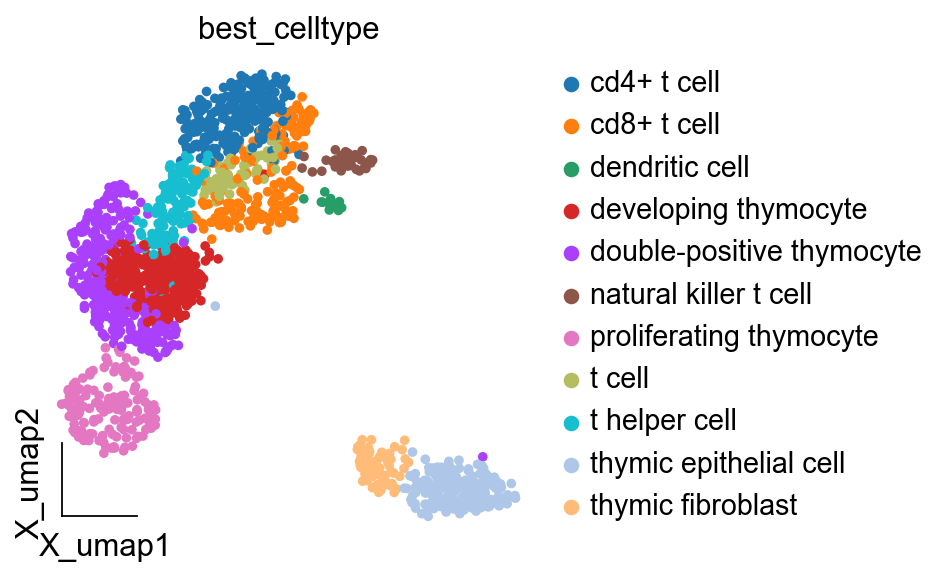

In [19]:
#sc.pp.neighbors(adata_bladder, n_neighbors=15, n_pcs=50,
#               use_rep='scaled|original|X_pca')
sc.tl.umap(adata_thymus,min_dist=1)
ov.pl.embedding(
        adata_thymus,
        basis='X_umap',
        color='best_celltype',
        frameon='small'
    )

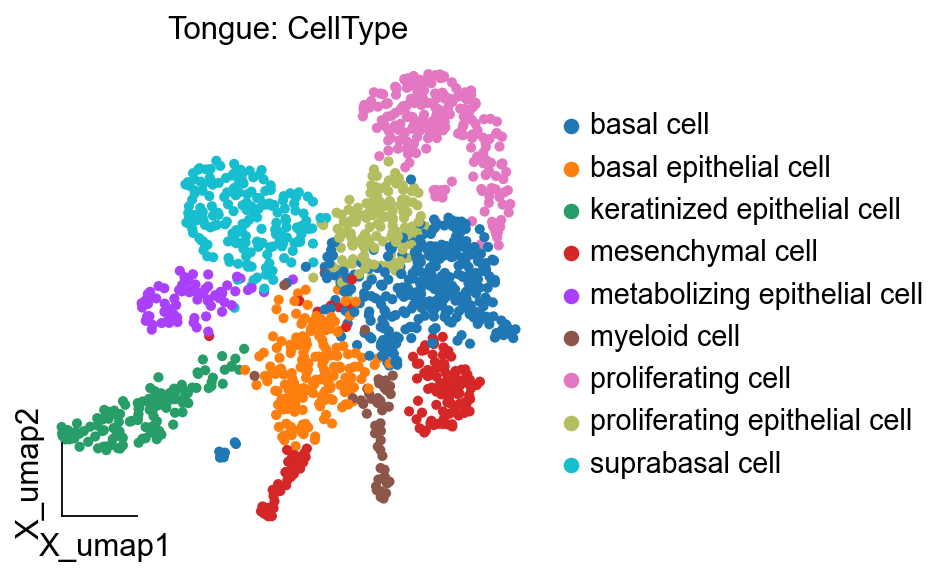

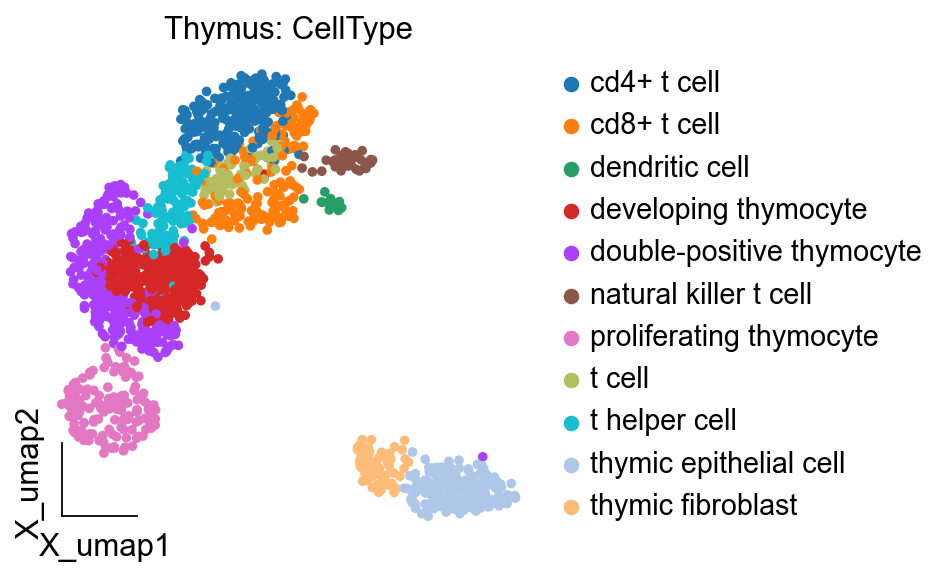

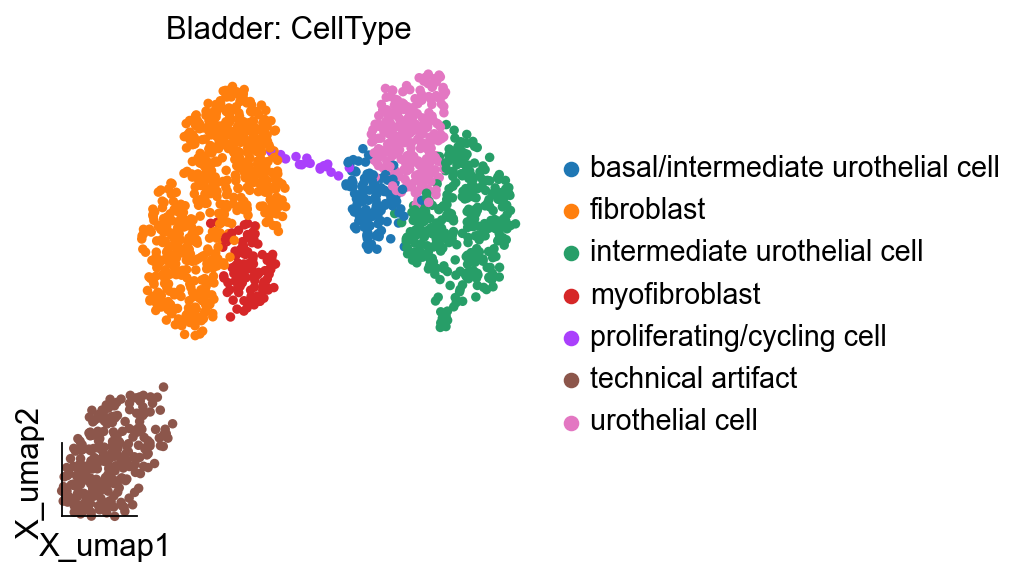

In [29]:
for name,adata in zip(['Tongue','Thymus','Bladder'],
                 [adata_tongue,adata_thymus,adata_bladder]):
    ov.pl.embedding(
        adata,
        basis='X_umap',
        color='best_celltype',
        frameon='small',
        show=False,
        title=f'{name}: CellType'
    )
    plt.savefig(f"figures/review/mouse_{name}_clusters.png",dpi=300,bbox_inches = 'tight')

In [21]:
import scvelo as scv
for adata in [adata_tongue,adata_thymus,adata_bladder]:
    adata.layers["spliced"] = adata.X
    adata.layers["unspliced"] = adata.X
    sc.pp.neighbors(adata, n_pcs=30, n_neighbors=30)
    scv.pp.moments(adata, n_pcs=None, n_neighbors=None)
    from cellrank.kernels import CytoTRACEKernel
    ctk = CytoTRACEKernel(adata).compute_cytotrace()

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
Computing CytoTRACE score with `10000` genes
Adding `adata.obs['ct_score']`
       `adata.obs['ct_pseudotime']`
       `adata.obs['ct_num_exp_genes']`
       `adata.var['ct_gene_corr']`
       `adata.var['ct_correlates']`
       `adata.uns['ct_params']`
    Finish (0:00:05)
computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances 

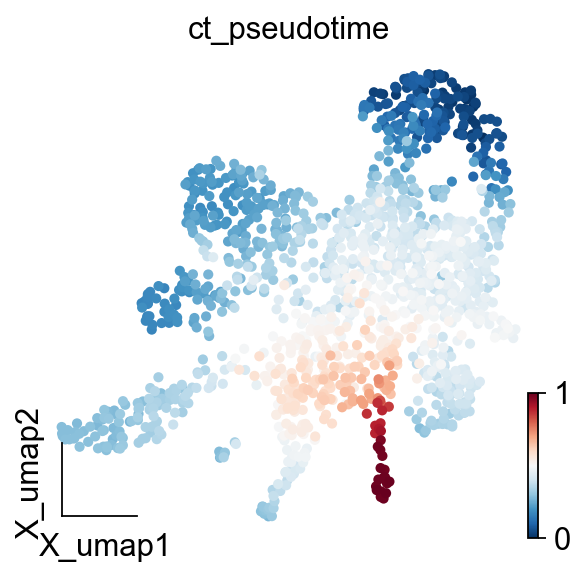

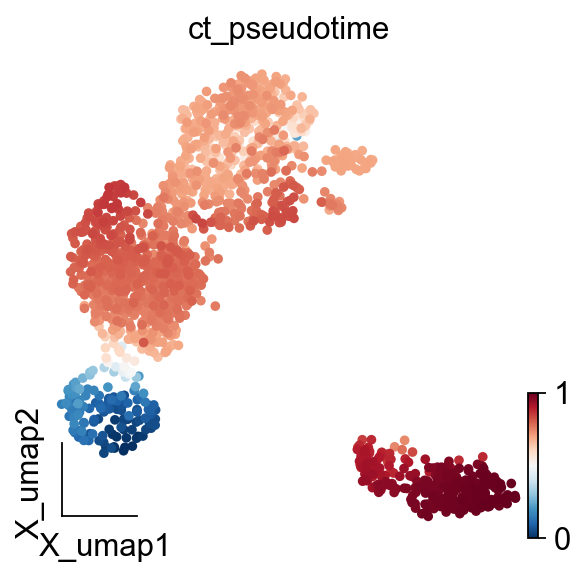

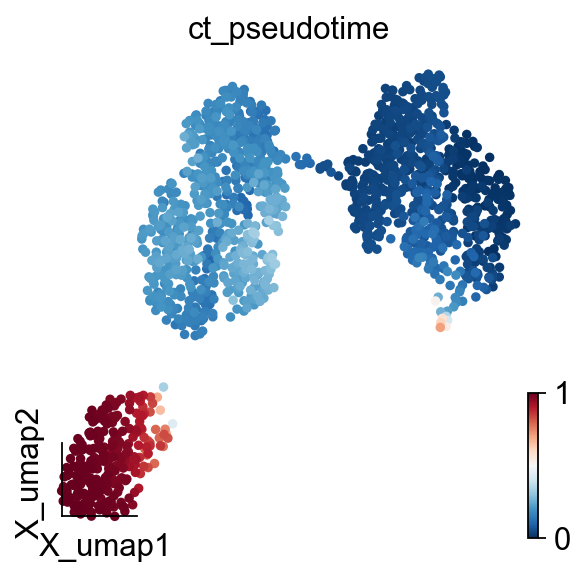

In [22]:
for adata in [adata_tongue,adata_thymus,adata_bladder]:
    ov.pl.embedding(
        adata,
        basis='X_umap',
        color='ct_pseudotime',
        frameon='small'
    )

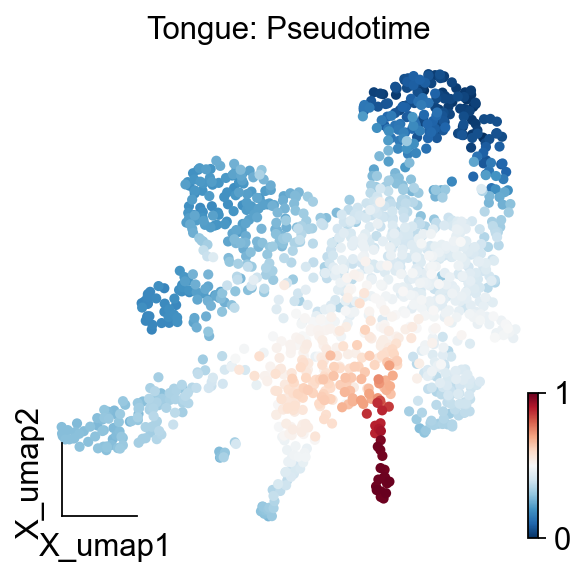

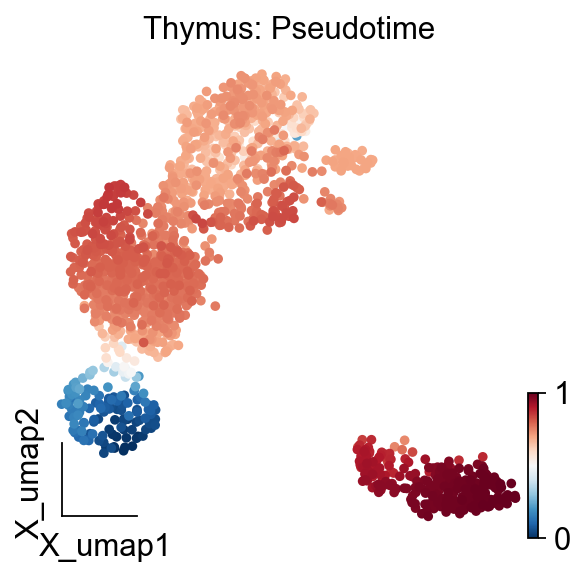

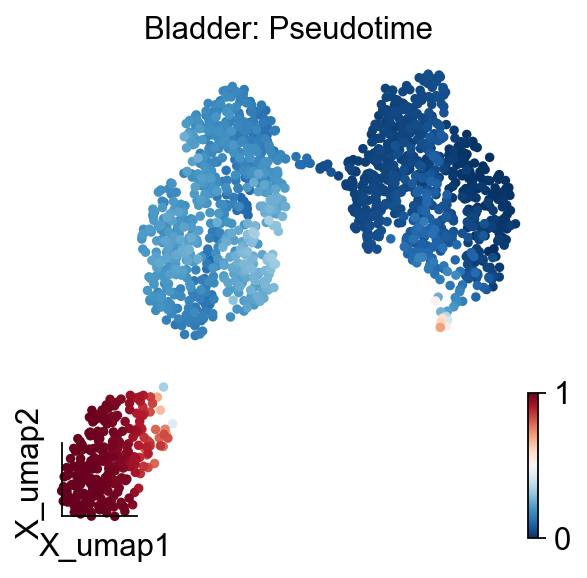

In [30]:
for name,adata in zip(['Tongue','Thymus','Bladder'],
                 [adata_tongue,adata_thymus,adata_bladder]):
    ov.pl.embedding(
        adata,
        basis='X_umap',
        color='ct_pseudotime',
        frameon='small',
        show=False,
        title=f'{name}: Pseudotime'
    )
    plt.savefig(f"figures/review/mouse_{name}_pseudotime.png",dpi=300,bbox_inches = 'tight')

In [46]:
for name,adata in zip(['Tongue','Thymus','Bladder'],
                 [adata_tongue,adata_thymus,adata_bladder]):
    adata.write(f'data/mouse_{name}_anno.h5ad',compression='gzip')

In [23]:
import Epiverse as ev
ev.utils.lsi(adata_tongue, n_components=20, n_iter=15)

In [24]:
ltnn_obj=ov.single.scLTNN(adata_tongue,basis='X_lsi',input_dim=20,cpu='cuda:0')

In [25]:
ltnn_obj.ANNmodel_init(pseudotime='ct_pseudotime',batch_size=20,)
ltnn_obj.ANNmodel_train(n_epochs=200)

Pre-ANN model: 100%|██████████| 200/200 [00:36<00:00,  5.52it/s, val loss, val mae=0.00235, 0.00235]


In [26]:
ltnn_obj.ANNmodel_save('model/tongue_model_20.h5')

In [27]:
#import scltnn
for adata in [adata_thymus,adata_bladder]:
    ev.utils.lsi(adata, n_components=20, n_iter=15)
    ltnn_obj=ov.single.scLTNN(adata,basis='X_lsi',input_dim=20,)
    ltnn_obj.ANNmodel_load('model/tongue_model_20.h5')
    ltnn_obj.cal_paga(use_rep='scaled|original|X_pca',resolution=1)
    ltnn_obj.cal_model_time()
    ltnn_obj.cal_exp_gene_value(rev=False,mode='ann')
    ltnn_obj.cal_dpt_pseudotime(leiden_range_start=0.05,leiden_range_mid=0.1,leiden_range_end=0.1)
    ltnn_obj.ANN(batch_size=30,n_epochs=200,verbose=0)
    ltnn_obj.cal_distrubute()
    ltnn_obj.cal_scLTNN_time()

......calculate paga
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 13 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
......predict model_time
filtered out 178 cells that have less than 200 genes expressed
filtered out 2229 genes that are detected in less than 3 cells
gene in p_time_low 0.326672 gene in p_time_high nan
......calculate dpt_pseudotime
computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.98887634 0.9852401  0.98115236 0.9715177  0.9470522
     0.9361956  0.92435604 0.91669023 0.

ANN model: 100%|██████████| 200/200 [00:19<00:00, 10.32it/s, val loss, val mae=0.01019, 0.01019]
[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 27.3471] [loc=0.290 scale=0.235]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 22.6093] [loc=0.000 scale=0.290]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 22.6093] [loc=-536870912.000 scale=536870912.000]
[distfit] >INFO> [dweibull  ] [0.14 sec] [RSS: 7.48239] [loc=0.122 scale=0.146]


......Dweibull analysis


[distfit] >INFO> [t         ] [0.23 sec] [RSS: 10.4975] [loc=0.165 scale=0.083]
[distfit] >INFO> [genextreme] [0.20 sec] [RSS: 8.54932] [loc=0.159 scale=0.108]
[distfit] >INFO> [gamma     ] [0.03 sec] [RSS: 15.2931] [loc=-0.000 scale=0.161]
[distfit] >INFO> [lognorm   ] [0.09 sec] [RSS: 10.6692] [loc=-0.005 scale=0.220]
[distfit] >INFO> [beta      ] [0.17 sec] [RSS: 15.1181] [loc=-0.000 scale=147589.001]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 32.0953] [loc=0.000 scale=1.000]
[distfit] >INFO> [loggamma  ] [0.10 sec] [RSS: 27.5274] [loc=-69.205 scale=9.437]
[distfit] >INFO> [norm      ] [1.02 sec] [RSS: 27.3471] [loc=0.290 scale=0.235]
[distfit] >INFO> [expon     ] [1.01 sec] [RSS: 22.6093] [loc=0.000 scale=0.290]
[distfit] >INFO> [pareto    ] [1.01 sec] [RSS: 22.6093] [loc=-536870912.000 scale=536870912.000]
[distfit] >INFO> [dweibull  ] [1.01 sec] [RSS: 7.48239] [loc=0.122 scale=0.146]
[distfit] >INFO> [t         ] [0.86 sec] [RSS: 10.4975] [loc=0.165 scale=0.083]
[distfit] >IN

......Norm analysis


[distfit] >INFO> [t         ] [0.51 sec] [RSS: 16.5044] [loc=0.336 scale=0.211]
[distfit] >INFO> [genextreme] [0.22 sec] [RSS: 23.2134] [loc=0.323 scale=0.557]
[distfit] >INFO> [gamma     ] [0.10 sec] [RSS: 16.6938] [loc=-4.628 scale=0.009]
[distfit] >INFO> [lognorm   ] [0.24 sec] [RSS: 16.6061] [loc=-13.007 scale=13.342]
[distfit] >INFO> [beta      ] [0.19 sec] [RSS: 14.4414] [loc=-0.007 scale=0.983]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 18.0705] [loc=-0.007 scale=0.981]
[distfit] >INFO> [loggamma  ] [0.04 sec] [RSS: 15.7871] [loc=-1.249 scale=0.680]
[distfit] >INFO> [norm      ] [1.39 sec] [RSS: 16.5044] [loc=0.336 scale=0.211]
[distfit] >INFO> [expon     ] [1.38 sec] [RSS: 16.5438] [loc=-0.007 scale=0.343]
[distfit] >INFO> [pareto    ] [1.38 sec] [RSS: 16.5438] [loc=-67108864.007 scale=67108864.000]
[distfit] >INFO> [dweibull  ] [1.38 sec] [RSS: 5.074] [loc=0.301 scale=0.222]
[distfit] >INFO> [t         ] [1.34 sec] [RSS: 16.5044] [loc=0.336 scale=0.211]
[distfit] >INFO> [g

......calculate scLTNN time
......calculate paga
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 13 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
......predict model_time
filtered out 207 cells that have less than 200 genes expressed
filtered out 1777 genes that are detected in less than 3 cells
gene in p_time_low 5.0476103 gene in p_time_high 0.49861252
......calculate dpt_pseudotime
computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.99810797 0.99675786 0.97148657 0.9623693  0.95141095
   

ANN model: 100%|██████████| 200/200 [00:23<00:00,  8.53it/s, val loss, val mae=0.00224, 0.00224]
[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 40.5745] [loc=0.544 scale=0.397]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 36.9374] [loc=0.000 scale=0.544]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 36.9374] [loc=-33554432.000 scale=33554432.000]
[distfit] >INFO> [dweibull  ] [0.04 sec] [RSS: 1.98468] [loc=0.474 scale=0.416]


......Dweibull analysis


[distfit] >INFO> [t         ] [0.51 sec] [RSS: 40.5745] [loc=0.544 scale=0.397]
[distfit] >INFO> [genextreme] [0.15 sec] [RSS: 34.2809] [loc=0.531 scale=0.436]
[distfit] >INFO> [gamma     ] [0.10 sec] [RSS: 40.7339] [loc=-4.867 scale=0.030]
[distfit] >INFO> [lognorm   ] [0.12 sec] [RSS: 35.9306] [loc=-0.002 scale=0.299]
[distfit] >INFO> [beta      ] [0.15 sec] [RSS: 37.2983] [loc=-0.000 scale=1.000]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 35.5556] [loc=0.000 scale=1.000]
[distfit] >INFO> [loggamma  ] [0.03 sec] [RSS: 31.2807] [loc=0.953 scale=0.017]
[distfit] >INFO> [norm      ] [1.15 sec] [RSS: 40.5745] [loc=0.544 scale=0.397]
[distfit] >INFO> [expon     ] [1.15 sec] [RSS: 36.9374] [loc=0.000 scale=0.544]
[distfit] >INFO> [pareto    ] [1.15 sec] [RSS: 36.9374] [loc=-33554432.000 scale=33554432.000]
[distfit] >INFO> [dweibull  ] [1.14 sec] [RSS: 1.98468] [loc=0.474 scale=0.416]
[distfit] >INFO> [t         ] [1.09 sec] [RSS: 40.5745] [loc=0.544 scale=0.397]
[distfit] >INFO> [gene

......Norm analysis


[distfit] >INFO> [t         ] [0.52 sec] [RSS: 44.6395] [loc=0.329 scale=0.212]
[distfit] >INFO> [genextreme] [0.12 sec] [RSS: 38.7185] [loc=0.288 scale=0.230]
[distfit] >INFO> [gamma     ] [0.12 sec] [RSS: 44.8609] [loc=-3.244 scale=0.013]
[distfit] >INFO> [lognorm   ] [0.25 sec] [RSS: 44.7889] [loc=-30.878 scale=31.206]
[distfit] >INFO> [beta      ] [0.17 sec] [RSS: 36.8465] [loc=-0.010 scale=0.671]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 36.7756] [loc=-0.010 scale=0.671]
[distfit] >INFO> [loggamma  ] [0.02 sec] [RSS: 32.7213] [loc=0.588 scale=0.031]
[distfit] >INFO> [norm      ] [1.29 sec] [RSS: 44.6395] [loc=0.329 scale=0.212]
[distfit] >INFO> [expon     ] [1.29 sec] [RSS: 41.7654] [loc=-0.010 scale=0.338]
[distfit] >INFO> [pareto    ] [1.29 sec] [RSS: 41.7654] [loc=-67108864.010 scale=67108864.000]
[distfit] >INFO> [dweibull  ] [1.28 sec] [RSS: 5.59529] [loc=0.299 scale=0.226]
[distfit] >INFO> [t         ] [1.24 sec] [RSS: 44.6395] [loc=0.329 scale=0.212]
[distfit] >INFO> [

......calculate scLTNN time


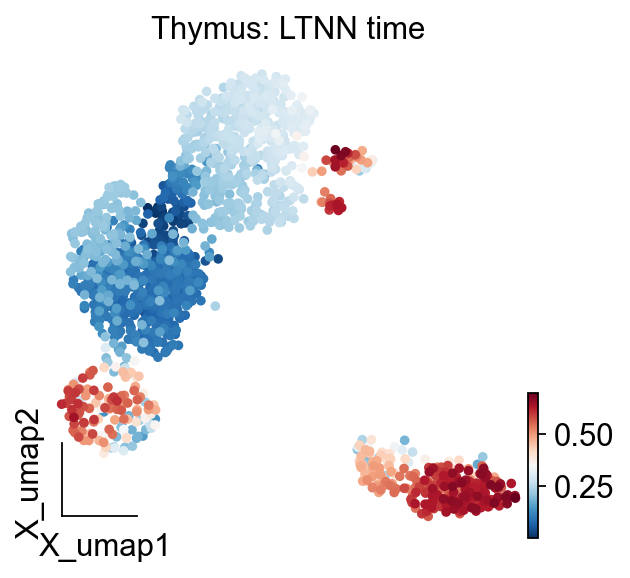

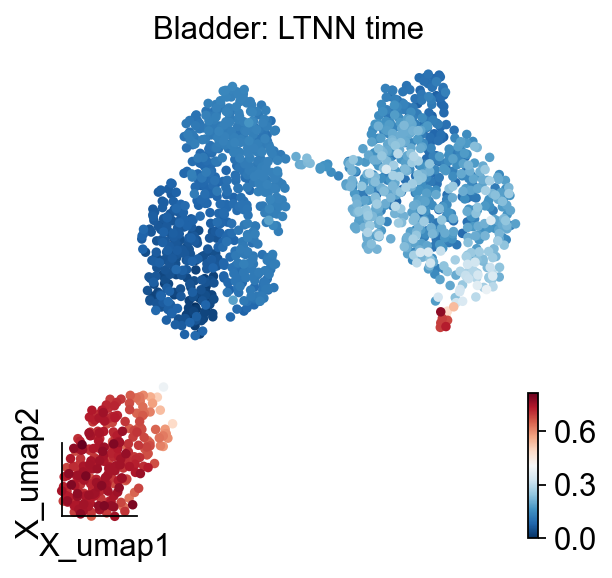

In [43]:
for name,adata in zip(['Thymus','Bladder'],
                 [adata_thymus,adata_bladder]):
    ov.pl.embedding(
        adata,
        basis='X_umap',
        color='LTNN_time',
        frameon='small',
        show=False,
        title=f'{name}: LTNN time'
    )
    plt.savefig(f"figures/review/mouse_{name}_ltnntime.png",dpi=300,bbox_inches = 'tight')

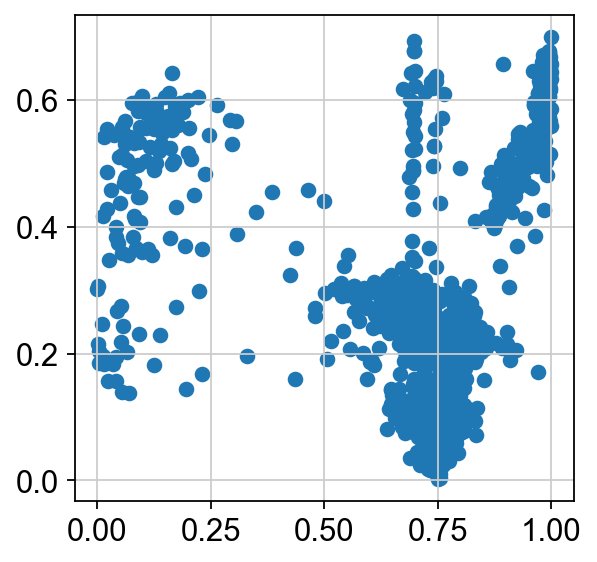

In [44]:
plt.scatter(adata_thymus.obs['ct_pseudotime'],
           adata_thymus.obs['LTNN_time'],)

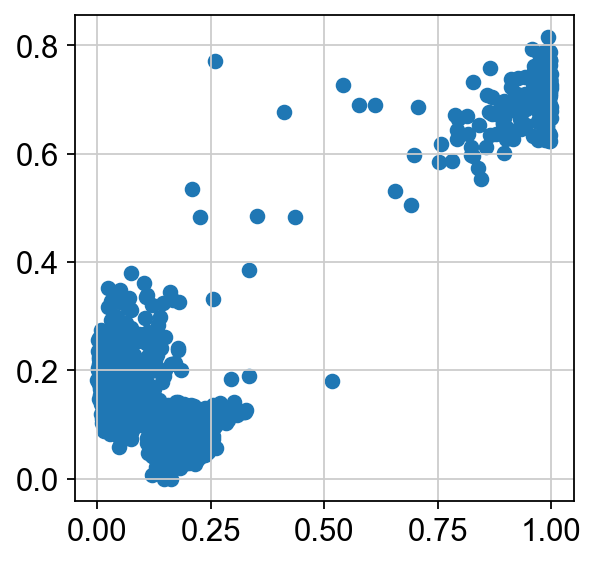

In [45]:
plt.scatter(adata_bladder.obs['ct_pseudotime'],
           adata_bladder.obs['LTNN_time'],)

In [8]:

def get_cluster_celltype(cluster_celltypes, cluster_markers, species, organization,
                        model,base_url):
    from openai import OpenAI
    import os
    import numpy as np
    import pandas as pd
    if base_url is None:
        if provider == 'openai':
            base_url = "https://api.openai.com/v1/"
        elif provider == 'kimi':
            base_url = "https://api.moonshot.cn/v1"
        elif provider == 'qwen':
            base_url = "https://dashscope.aliyuncs.com/compatible-mode/v1"
    QWEN_API_KEY = os.getenv("AGI_API_KEY")
    if QWEN_API_KEY == "":
        print("Note: AGI API key not found: returning the prompt itself.")
        API_flag = False
    else:
        API_flag = True
    client = OpenAI(
        api_key=QWEN_API_KEY, # 如果您没有配置环境变量，请在此处用您的API Key进行替换
        base_url=base_url,
    )
    
    cluster_celltype = {}
    from tqdm import tqdm
    for cluster_id, celltypes in tqdm(cluster_celltypes.items()):
        markers = cluster_markers.get(cluster_id, [])
        
        # 构造提示信息
        prompt = (
            f"Given the species: {species} and organization: {organization}, "
            f"determine the most suitable cell type for cluster {cluster_id}. "
            f"The possible cell types are: {', '.join(celltypes)}. "
            f"The gene markers for this cluster are: {', '.join(markers)}. "
            f"Which cell type best represents this cluster? "
            f"Only provide the cell type name. Do not show numbers before the name. Some can be a mixture of multiple cell types."
            f"Do not provide the plural form of celltype."
        )
        
        # 调用 OpenAI API
        #response = client.chat.completions.create(
        #            model=model,
        #            messages=[{"role": "user", 
        #                       "content": f'Identify cell types of {tissuename} cells using the following markers separately for each row. Only provide the cell type name. Do not show numbers before the name. Some can be a mixture of multiple cell types.\n' + '\n'.join([input[list(input.keys())[j]] for j in id_list if input[list(input.keys())[j]] != 'unknown'])}]
        #        )
        response = client.chat.completions.create(
            model=model,  # 使用 GPT-4 引擎
            messages=[{"role": "user", 
                               "content": prompt}],
            max_tokens=50,
            n=1,
            stop=None,
            temperature=0.2,  # 设置温度以减少结果的随机性
        )

        # 获取模型的回答
        answer = response.choices[0].message.content.split('\n')
        
        # 将回答加入结果字典
        cluster_celltype[cluster_id] = answer[0].lower()
    
    return cluster_celltype

